In [1]:
# Tutorial code of 1-D GAN
# http://blog.naver.com/atelierjpro/220984758512
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import tensorflow as tf


In [2]:
sess = tf.InteractiveSession()
mu = 0.8
sigma=0.1
num_bins = 100
num_samples = 1000000

class GenerativeNetwork:
    dim_z=1
    dim_g=1
    
    def __init__(self):
        rand_uni = tf.random_uniform_initializer(-1e1,1e1)
        self.z_input = tf.placeholder(tf.float32,shape = [None,self.dim_z],name = "z-input")
        self.W0 = tf.Variable(rand_uni([self.dim_z,self.dim_g]))
        self.b0 = tf.Variable(rand_uni([self.dim_g]))
        self.g = tf.nn.sigmoid(tf.matmul(self.z_input,self.W0)+self.b0)
        
    def generate(self,z_i):
        z_i = np.reshape(z_i,[-1,self.dim_z])
        g_i = sess.run([self.g],feed_dict={self.z_input : z_i})
        return g_i[0]


class Discriminator:
    dim_x = 1
    dim_d = 1
    num_hidden_neurons = 10
    learning_rate = 0.1
    x_input = tf.placeholder(tf.float32,shape=[None,dim_x],name="x_input")
    d_target = tf.placeholder(tf.float32,shape=[None,dim_d],name="d_target")

    rand_uni = tf.random_uniform_initializer(-1e-2,1e-2)

    W0 = tf.Variable(rand_uni([dim_x,num_hidden_neurons]))
    b0 = tf.Variable(rand_uni([num_hidden_neurons]))
    W1 = tf.Variable(rand_uni([num_hidden_neurons,dim_d]))
    b1 = tf.Variable(rand_uni([dim_d]))

    
    def __init__(self):
        
        self.d = self.getNetwork(self.x_input)
        
        self.loss = tf.losses.mean_squared_error(self.d,self.d_target)
        
        self.opt = tf.train.AdamOptimizer(self.learning_rate).minimize(self.loss)
        
    def getNetwork(self,input):
        
        temp = tf.nn.tanh(tf.matmul(input,self.W0)+self.b0)
        return tf.nn.sigmoid(tf.matmul(temp,self.W1)+self.b1)
    
    def discriminate(self,x_i):
        d_i = sess.run([self.d],feed_dict={self.x_input:x_i})
        return d_i[0]
    
    def train(self,x_i,d_i):
        error,_ = sess.run([self.loss,self.opt],feed_dict={self.x_input:x_i,self.d_target:d_i})
        return error

def draw(x,z,g,D):
    #draw histogram
    bins = np.linspace(0,1,num_bins)
    px, _ = np.histogram(x,bins=bins, density = True)
    pz, _ = np.histogram(z,bins=bins, density = True)
    pg,_ = np.histogram(g,bins=bins, density= True)

    v = np.linspace(0,1,len(px))

    v_i = np.reshape(v,(len(v),D.dim_x))
    db = D.discriminate(v_i)
    db = np.reshape(db,len(v))

    l = plt.plot(v,px,'b--',linewidth=1)
    l = plt.plot(v,pz,'r--',linewidth=1)
    l = plt.plot(v,pg,'g--',linewidth=1)
    l = plt.plot(v,db,'k--',linewidth=1)


    plt.title('1D GAN Test')
    plt.xlabel('Data values')
    plt.ylabel('Probability density')
    plt.show()


Hello! GAN!
Pre-train Discriminator
0.278259
0.254707
0.0304954
0.0224658
0.0316778
0.0194684
0.0323922
0.0183649
0.0327496
0.017849


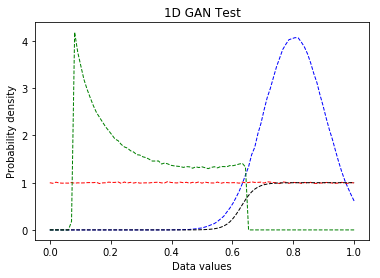

Train Generator
11.3111
4.6963
1.11008
0.192807
0.0543131
0.0258628
0.0160612
0.011428
0.00879806
0.00712401
0.00597226
0.0051347
0.00449969
0.00400256
0.00360317
0.00327557
0.00300215
0.00277065
0.00257214
0.00240008
0.00224958
0.0021168
0.00199882
0.00189333
0.00179842
0.00171259
0.0016346
0.00156344
0.00149826
0.00143835
0.00138304
0.00133188
0.00128437
0.00124019
0.00119894
0.00116038
0.00112428
0.00109033
0.00105842
0.00102832
0.000999911
0.000973039
0.000947595
0.000923464
0.000900548
0.000878736
0.000857998
0.000838224
0.000819343
0.000801293
0.000784009
0.000767524
0.00075171
0.000736522
0.000721991
0.000707985
0.000694545
0.000681606
0.000669118
0.000657113
0.000645527
0.000634385
0.000623595
0.000613164
0.000603096
0.000593314
0.000583912
0.000574759
0.000565909
0.000557349
0.000549012
0.000540991
0.000533198
0.000525577
0.000518219
0.000511083
0.000504085
0.000497287
0.000490719
0.000484297
0.000478007
0.000471915
0.000466015
0.000460211
0.000454538
0.000449021
0.000443684
0

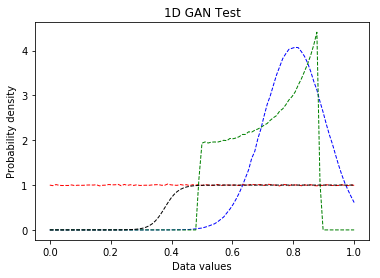

In [4]:
print("Hello! GAN!")

x = np.random.normal(mu,sigma,num_samples)
z = np.random.uniform(0,1,num_samples)
g = np.ndarray(num_samples)

G = GenerativeNetwork()
D = Discriminator()

tf.global_variables_initializer().run()

# for i in range(0,num_samples,1):
#     z_i = np.reshape(z[i],G.dim_z)
#     g[i] =G.generate(z_i)
x_i = np.reshape(x,(num_samples,D.dim_x))
z_i = np.reshape(z,(num_samples,G.dim_z))
g_i = G.generate(z_i)
g = np.reshape(g_i,(num_samples))

d_x_i = np.ndarray(shape=(num_samples,D.dim_x))
d_x_i.fill(1.0)

d_g_i = np.ndarray(shape = (num_samples,D.dim_x))
d_g_i.fill(0.0)

# Not a good way to train.
# TODO: shuffle samples
print("Pre-train Discriminator")
for tr in range(0,500,1):
    D.train(x_i,d_x_i)
    D.train(g_i,d_g_i)
    if tr % 100 ==0:
        print(D.train(x_i,d_x_i))
        print(D.train(g_i,d_g_i))

draw(x,z,g,D)
# GAN algorithm

# Training Generator
D_from_g = D.getNetwork(G.g)

loss_g = tf.reduce_mean(-tf.log(D_from_g))

opt_g = tf.train.GradientDescentOptimizer(1e-3).minimize(loss_g)

print("Train Generator")
for tr in range(0,10000,1):
    sess.run([loss_g, opt_g],feed_dict={G.z_input:z_i})
    if tr%100==0:
        error,_ = sess.run([loss_g, opt_g],feed_dict={G.z_input:z_i})
        print(error)
        
        
# generate g_i again after training Generator
g_i = G.generate(z_i)
g = np.reshape(g_i,(num_samples))

draw(x,z,g,D)